In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/FYP/Speaker/Contrastive')
os.environ['TF_CPP_MIN_LOG_LEVEL']= '3'

import tensorflow as tf
tf.autograph.set_verbosity(0)

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from siamese import Siamese

In [4]:
LSTM_PATH = 'Model/LSTM/'
CONV1D_PATH = 'Model/Conv1D/'
CONV2D_PATH = 'Model/Conv2D/'
DATA_PATH = '../Data/Data/'

In [5]:
W = 300
H = 128

In [6]:
print('Loading data')
with open(DATA_PATH + 'test.pickle', 'rb') as f:
    X_test, s_test = pickle.load(f)

Loading data


In [7]:
def test(X, s, model, N, k):
    n_correct = 0

    for i in range(k):
        p, y = get_batch(X, s, N)
        pred = model.predict(p)
        # print(pred, y)

        if np.argmin(y) == np.argmin(pred):
            n_correct += 1

    p = 100 * n_correct / k
    print('Average of {}% accuracy in {}-way one-shot learning tasks'.format(p, N))
    return p

In [8]:
def get_pairs(X, s, sim):
    speakers = list(s.keys())
    num = len(speakers)
    
    if sim:
        s1 = np.random.randint(0, num)
        l1, h1 = s[speakers[s1]]
        
        i1_1 = np.random.randint(l1, h1+1) - l1
        i1_2 = np.random.randint(l1, h1+1) - l1
        while i1_2 == i1_1:
            i1_2 = np.random.randint(l1, h1+1) - l1
            
        p1 = abs(X[s1][i1_1])
        p2 = abs(X[s1][i1_2])
        y = 0.
        
    else:
        s1 = np.random.randint(0, num)
        s2 = np.random.randint(0, num)
        while s1 == s2:
            s2 = np.random.randint(0, num)
            
        l1, h1 = s[speakers[s1]]
        l2, h2 = s[speakers[s2]]
        
        i1 = np.random.randint(l1, h1+1) - l1
        i2 = np.random.randint(l2, h2+1) - l2
        
        p1 = abs(X[s1][i1])
        p2 = abs(X[s2][i2])
        y = 1.
    
    return p1.reshape(W, H, 1), p2.reshape(W, H, 1), y

def get_batch(X, s, batch_size):
    pair1 = []
    pair2 = []
    labels = []
    
    for _ in range(1):
        p1, p2, y = get_pairs(X, s, True)
        pair1.append(p1)
        pair2.append(p2)
        labels.append(y)
        
    for _ in range(batch_size - 1):
        p1, p2, y = get_pairs(X, s, False)
        pair1.append(p1)
        pair2.append(p2)
        labels.append(y)
        
    pair1, pair2, labels = np.array(pair1), np.array(pair2), np.array(labels)
    _ = np.random.permutation(len(pair1))
    return [pair1[_], pair2[_]], labels[_]

In [9]:
lstm_acc = []
model = Siamese((W, H, 1), name='lstm', model_path=LSTM_PATH+'lstm_50.h5', margin=0.5)
for i in range(2, 33):
    acc = test(X_test, s_test, model.model, i, 100)
    lstm_acc.append(acc)

Average of 92.0% accuracy in 2-way one-shot learning tasks
Average of 85.0% accuracy in 3-way one-shot learning tasks
Average of 78.0% accuracy in 4-way one-shot learning tasks
Average of 70.0% accuracy in 5-way one-shot learning tasks
Average of 58.0% accuracy in 6-way one-shot learning tasks
Average of 63.0% accuracy in 7-way one-shot learning tasks
Average of 52.0% accuracy in 8-way one-shot learning tasks
Average of 55.0% accuracy in 9-way one-shot learning tasks
Average of 57.0% accuracy in 10-way one-shot learning tasks
Average of 52.0% accuracy in 11-way one-shot learning tasks
Average of 51.0% accuracy in 12-way one-shot learning tasks
Average of 53.0% accuracy in 13-way one-shot learning tasks
Average of 41.0% accuracy in 14-way one-shot learning tasks
Average of 42.0% accuracy in 15-way one-shot learning tasks
Average of 46.0% accuracy in 16-way one-shot learning tasks
Average of 31.0% accuracy in 17-way one-shot learning tasks
Average of 33.0% accuracy in 18-way one-shot lea

In [10]:
conv2d_acc = []
model = Siamese((W, H, 1), name='conv_2d', model_path=CONV2D_PATH+'conv2d_50.h5', margin=0.5)
for i in range(2, 33): 
    acc = test(X_test, s_test, model.model, i, 100)
    conv2d_acc.append(acc)

Average of 92.0% accuracy in 2-way one-shot learning tasks
Average of 80.0% accuracy in 3-way one-shot learning tasks
Average of 74.0% accuracy in 4-way one-shot learning tasks
Average of 77.0% accuracy in 5-way one-shot learning tasks
Average of 71.0% accuracy in 6-way one-shot learning tasks
Average of 60.0% accuracy in 7-way one-shot learning tasks
Average of 60.0% accuracy in 8-way one-shot learning tasks
Average of 63.0% accuracy in 9-way one-shot learning tasks
Average of 65.0% accuracy in 10-way one-shot learning tasks
Average of 53.0% accuracy in 11-way one-shot learning tasks
Average of 46.0% accuracy in 12-way one-shot learning tasks
Average of 54.0% accuracy in 13-way one-shot learning tasks
Average of 53.0% accuracy in 14-way one-shot learning tasks
Average of 54.0% accuracy in 15-way one-shot learning tasks
Average of 51.0% accuracy in 16-way one-shot learning tasks
Average of 46.0% accuracy in 17-way one-shot learning tasks
Average of 44.0% accuracy in 18-way one-shot lea

In [11]:
conv1d_acc = []
model = Siamese((W, H, 1), name='conv_1d', model_path=CONV1D_PATH+'conv1d_10.h5', margin=0.5)
for i in range(2, 33): 
    acc = test(X_test, s_test, model.model, i, 100)
    conv1d_acc.append(acc)

Average of 86.0% accuracy in 2-way one-shot learning tasks
Average of 85.0% accuracy in 3-way one-shot learning tasks
Average of 82.0% accuracy in 4-way one-shot learning tasks
Average of 74.0% accuracy in 5-way one-shot learning tasks
Average of 68.0% accuracy in 6-way one-shot learning tasks
Average of 66.0% accuracy in 7-way one-shot learning tasks
Average of 58.0% accuracy in 8-way one-shot learning tasks
Average of 57.0% accuracy in 9-way one-shot learning tasks
Average of 62.0% accuracy in 10-way one-shot learning tasks
Average of 62.0% accuracy in 11-way one-shot learning tasks
Average of 50.0% accuracy in 12-way one-shot learning tasks
Average of 60.0% accuracy in 13-way one-shot learning tasks
Average of 56.0% accuracy in 14-way one-shot learning tasks
Average of 55.0% accuracy in 15-way one-shot learning tasks
Average of 46.0% accuracy in 16-way one-shot learning tasks
Average of 53.0% accuracy in 17-way one-shot learning tasks
Average of 47.0% accuracy in 18-way one-shot lea

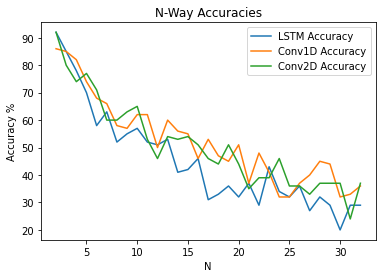

In [12]:
plt.plot(list(range(2, 33)), lstm_acc, label='LSTM Accuracy')
plt.plot(list(range(2, 33)), conv1d_acc, label='Conv1D Accuracy')
plt.plot(list(range(2, 33)), conv2d_acc, label='Conv2D Accuracy')
plt.xlabel('N')
plt.ylabel('Accuracy %')
plt.legend(loc='best')
plt.title('N-Way Accuracies')
plt.savefig('Plots/Contrastive_Accuracy.png')